Theta0: 1.2859081791603355
Theta1-n: [ 1.96344255e+00  2.79551843e+00 -2.17512775e+00 -1.87579679e+00
 -1.11015496e+00 -2.40440365e+00  1.36681875e+00  2.55324239e+00
 -4.88734546e-01 -9.23749304e-01  9.89557477e-02  1.71684360e-01
 -1.28049537e-02 -1.81060255e-02  1.01830660e-03  1.08990095e-03
 -4.36786298e-05 -3.47259213e-05  7.47121554e-07  4.52759576e-07]
Erreur quadratique moyenne : 0.19291471113620057


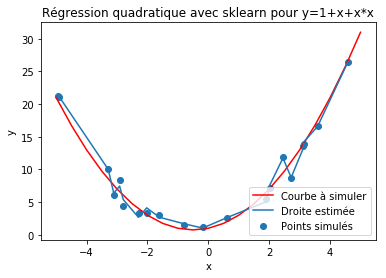

In [17]:
# Régression polynomiale quadratique pour des données simulées avec sklearn
# Transformation des données avec PolynomialFeatures

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
transformateur_poly = PolynomialFeatures(degree=20, include_bias=False)

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2

# Génération de données avec résidus ~ N(0,1)
m=20 # nombre de lignes de données
theta_simule = (1,1,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X1 = np.random.rand(m)*10-5 # m valeurs de x entre -5 et 5
X=np.sort(X1)
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la courbe du modèle simulé
X_modele = np.arange(-5,5.1,0.5) 
Y_modele = h_quadratique_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Courbe à simuler')


def h_poly_univarie(theta,x):
    x_poly = transformateur_poly.fit_transform(x[:,np.newaxis])
    return theta.dot(x_poly)


theta_poly = np.ones(10)

# Transformation par PolynomialFeatures
X_poly = transformateur_poly.fit_transform(X[:,np.newaxis])

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
modele = LinearRegression(fit_intercept=True)
modele.fit(X_poly,Y)
X_modele_poly = transformateur_poly.fit_transform(X_modele[:,np.newaxis])
Y_estime = modele.predict(X_poly)

print("Theta0:", modele.intercept_)
print("Theta1-n:", modele.coef_)
print("Erreur quadratique moyenne :", mean_squared_error(modele.predict(transformateur_poly.fit_transform(X[:,np.newaxis])),Y))
plt.plot(X,Y_estime,label='Droite estimée')

plt.title('Régression quadratique avec sklearn pour y=1+x+x*x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()